In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Tickers indice-pais
tickers = ['EWZ', 'EWJ', 'ERUS', 'INDA', 'FXI', 'SPY'] # Brasil, Japão, Russia, India, China, S&P 500. Respectivamente.

Brics = ['EWZ' , 'ERUS', 'INDA', 'FXI']

Desenvolvidos = ['EWJ' , 'SPY']

Separando nosso dados em dois periodos:

1 - Pré Pandemico (2015-2019) - Importante para analisarmos um mercado estavável

2 - Pandemico e pós pandemico (2020 - 2023) - Importante para analisarmos o mercado em máximo estresse.

Primeiro periodo - Pré Pandemico (2015 - 2019)

In [ ]:
# Intervalo de datas 
start_date = '2015-01-01'
end_date = '2019-12-31'

# Dados históricos dos tickers
data = yf.download(tickers, start=start_date, end=end_date)

# Transformar MultiIndex em colunas normais
data.columns = [f"{col[0]}_{col[1]}" for col in data.columns]

#Acertando datas 
data.index = pd.to_datetime(data.index)

# Facilitando o intendimento dos indices 
Paises = {
    'AdjClose_EWZ': 'AdjClose_EWZ_Brasil',
    'AdjClose_EWJ': 'AdjClose_EWJ_Japão',
    'AdjClose_ERUS': 'AdjClose_ERUS_Rússia',
    'AdjClose_INDA': 'AdjClose_INDA_Índia',
    'AdjClose_FXI': 'AdjClose_FXI_China',
    'AdjClose_SPY': 'AdjClose_SPY_EUA'
}

data.rename(columns = Paises , inplace = True)

# Reenomeando para facilitação (Acredito que ajudará)
data.rename(columns=lambda x: x.replace("Adj Close", "AdjClose"), inplace=True)


display(data)


Coefiente de varição Pearson -  Alocados nas variaveis CLOSE, LOW e HIGH (Tentaremos verificar se qual a influencias entre os mercados)

Fazedo uma correlação de retorno - Todas as variaveis 

In [ ]:
#Todas variaves - Heatmap

returns = data.pct_change().dropna()  # Calcula a variação percentual diária de cada variavel (coluna) - Retornos Diários

#display(returns)


plt.figure(figsize=(10, 6))
sns.heatmap(returns.corr(), cmap='coolwarm')
plt.title('Correlação entre os ETFs')
plt.show()



Apesar de dificil Visualização, podemos inferir algumas coisas:

O Volume negociado é totalmente independente sobre as demais variaveis (Close, Low, High and Open) 

O indice ERUS (Russia) sofre menos influencia de outros mercados (Aparentemente)

Dividindo por Variavel (LOW, HIGH, CLOSE, OPEN, VOLUME)

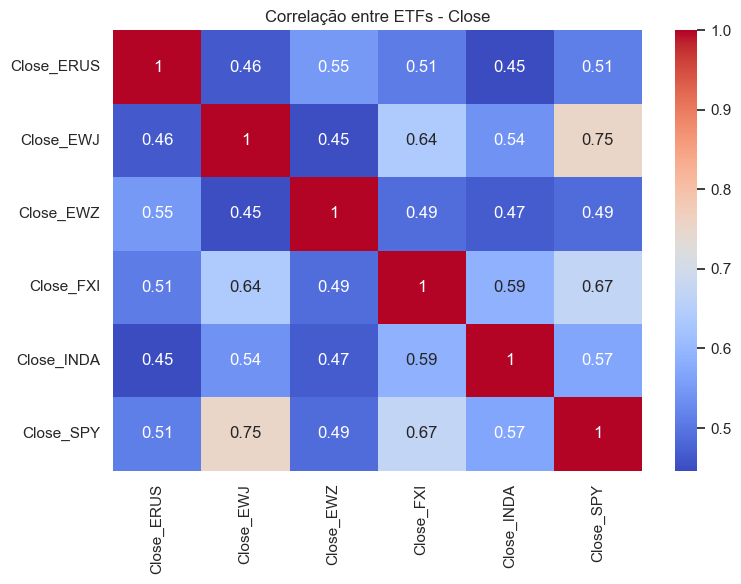

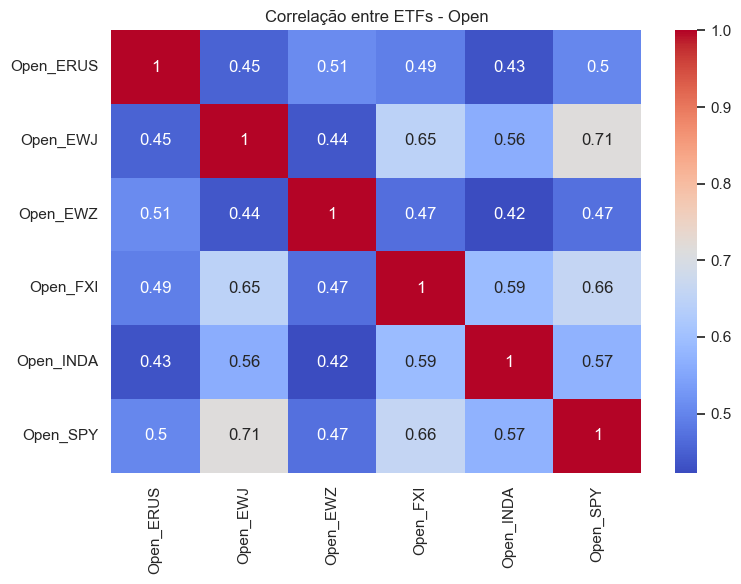

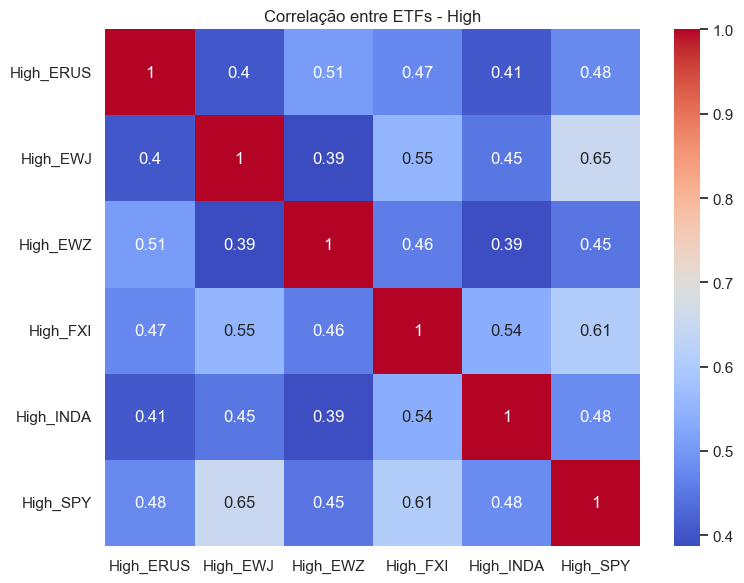

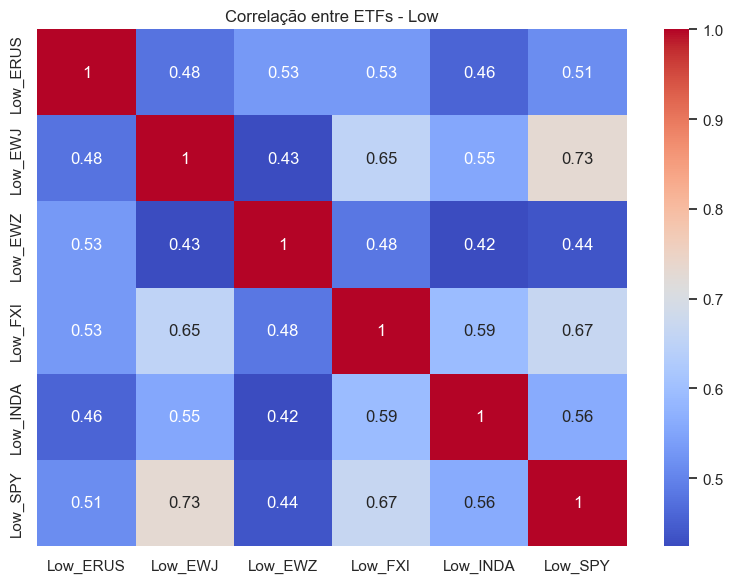

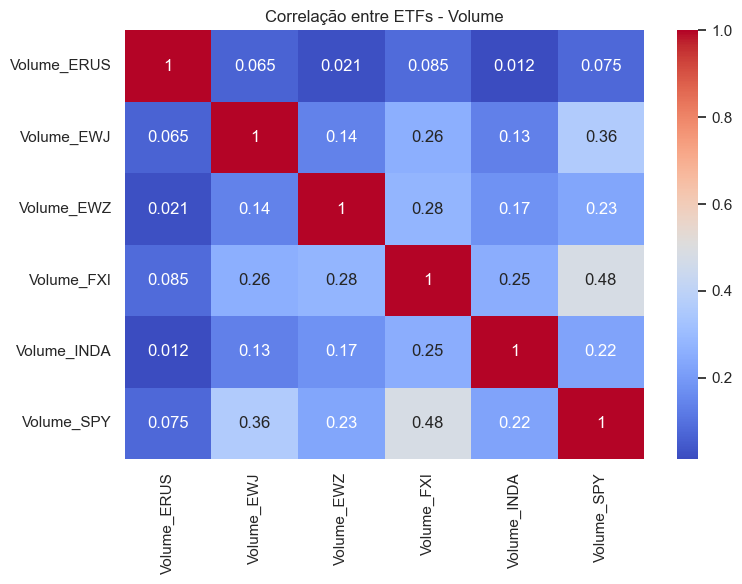

In [15]:
for tipo in ['Close', 'Open', 'High', 'Low', 'Volume']:
    subset = data.filter(like=tipo)
    returns = subset.pct_change().dropna()
    plt.figure(figsize=(8, 6))
    sns.heatmap(returns.corr(), annot=True, cmap='coolwarm')
    plt.title(f'Correlação entre ETFs - {tipo}')
    plt.tight_layout()
    plt.show()

Normalizando o desempenho acumulado (Variações diárias) - Perido 1


In [ ]:
# Reenomeando para facilitação (Acredito que ajudará)
#data.rename(columns=lambda x: x.replace("Adj Close", "AdjClose"), inplace=True)

#Filtrar apenas fechamento
adj_close = data[['Close_ERUS', 'Close_EWZ' , 'Close_EWZ', 'Close_FXI', 'Close_INDA', 'Close_SPY']]

# Normalização para variações percentuais
normalized = adj_close/ adj_close.iloc[0] * 100

#Comparar o desempenho acumulado (matplto)
#normalized.plot(figsize=(12, 6), title='Desempenho acumulado dos ETFs (base 100)')

# Transforma os dados para formato "long" (necessário para seaborn)
normalized_long = normalized.reset_index().melt(id_vars='Date', var_name='ETF', value_name='Valor')

# Cria o gráfico com seaborn
sns.lineplot(data=normalized_long, x='Date', y='Valor', hue='ETF', palette='tab10')


display(normalized)

Segundo Periodo - Pandemico (2020 - 2023)

In [ ]:
# Intervalo de datas 
#start_date = '2020-01-01'
#end_date = '2023-12-31'

# Dados históricos dos tickers
data = yf.download(tickers, start=start_date, end=end_date)

# Transformar MultiIndex em colunas normais
data.columns = [f"{col[0]}_{col[1]}" for col in data.columns]

#Acertando datas 
data.index = pd.to_datetime(data.index)

# Reenomeando para facilitação (Acredito que ajudará)
data.rename(columns=lambda x: x.replace("Adj Close", "AdjClose"), inplace=True)

#display(data)